In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Chaninging Column Names

In [4]:
Feature = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

In [5]:
df.rename(columns= {'Pregnancies': 'pregnant', 'Glucose':'glucose','BloodPressure':'bp','SkinThickness':'skin','BMI':'bmi','DiabetesPedigreeFunction':'pedigree','Age':'age','Outcome':'label','Insulin':'insulin'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Feature Selection**

In [7]:
x= df[Feature]

In [8]:
y=df.label

In [9]:
x.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [10]:
y.head(3)

0    1
1    0
2    1
Name: label, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [13]:
x_train.shape,y_train.shape

((537, 8), (537,))

In [14]:
x_test.shape,y_test.shape

((231, 8), (231,))

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf=DecisionTreeClassifier()

In [17]:
clf=clf.fit(x_train,y_train)

In [18]:
y_pred=clf.predict(x_test)

In [19]:
from sklearn import metrics

In [20]:
print("Accuracy: ", metrics.accuracy_score(y_pred,y_test))

Accuracy:  0.7056277056277056


In [21]:
print("Confusion Matrix :\n", metrics.confusion_matrix(y_pred,y_test))

Confusion Matrix :
 [[117  41]
 [ 27  46]]


In [25]:
cn=['Dibetic','Non-Bibetic']

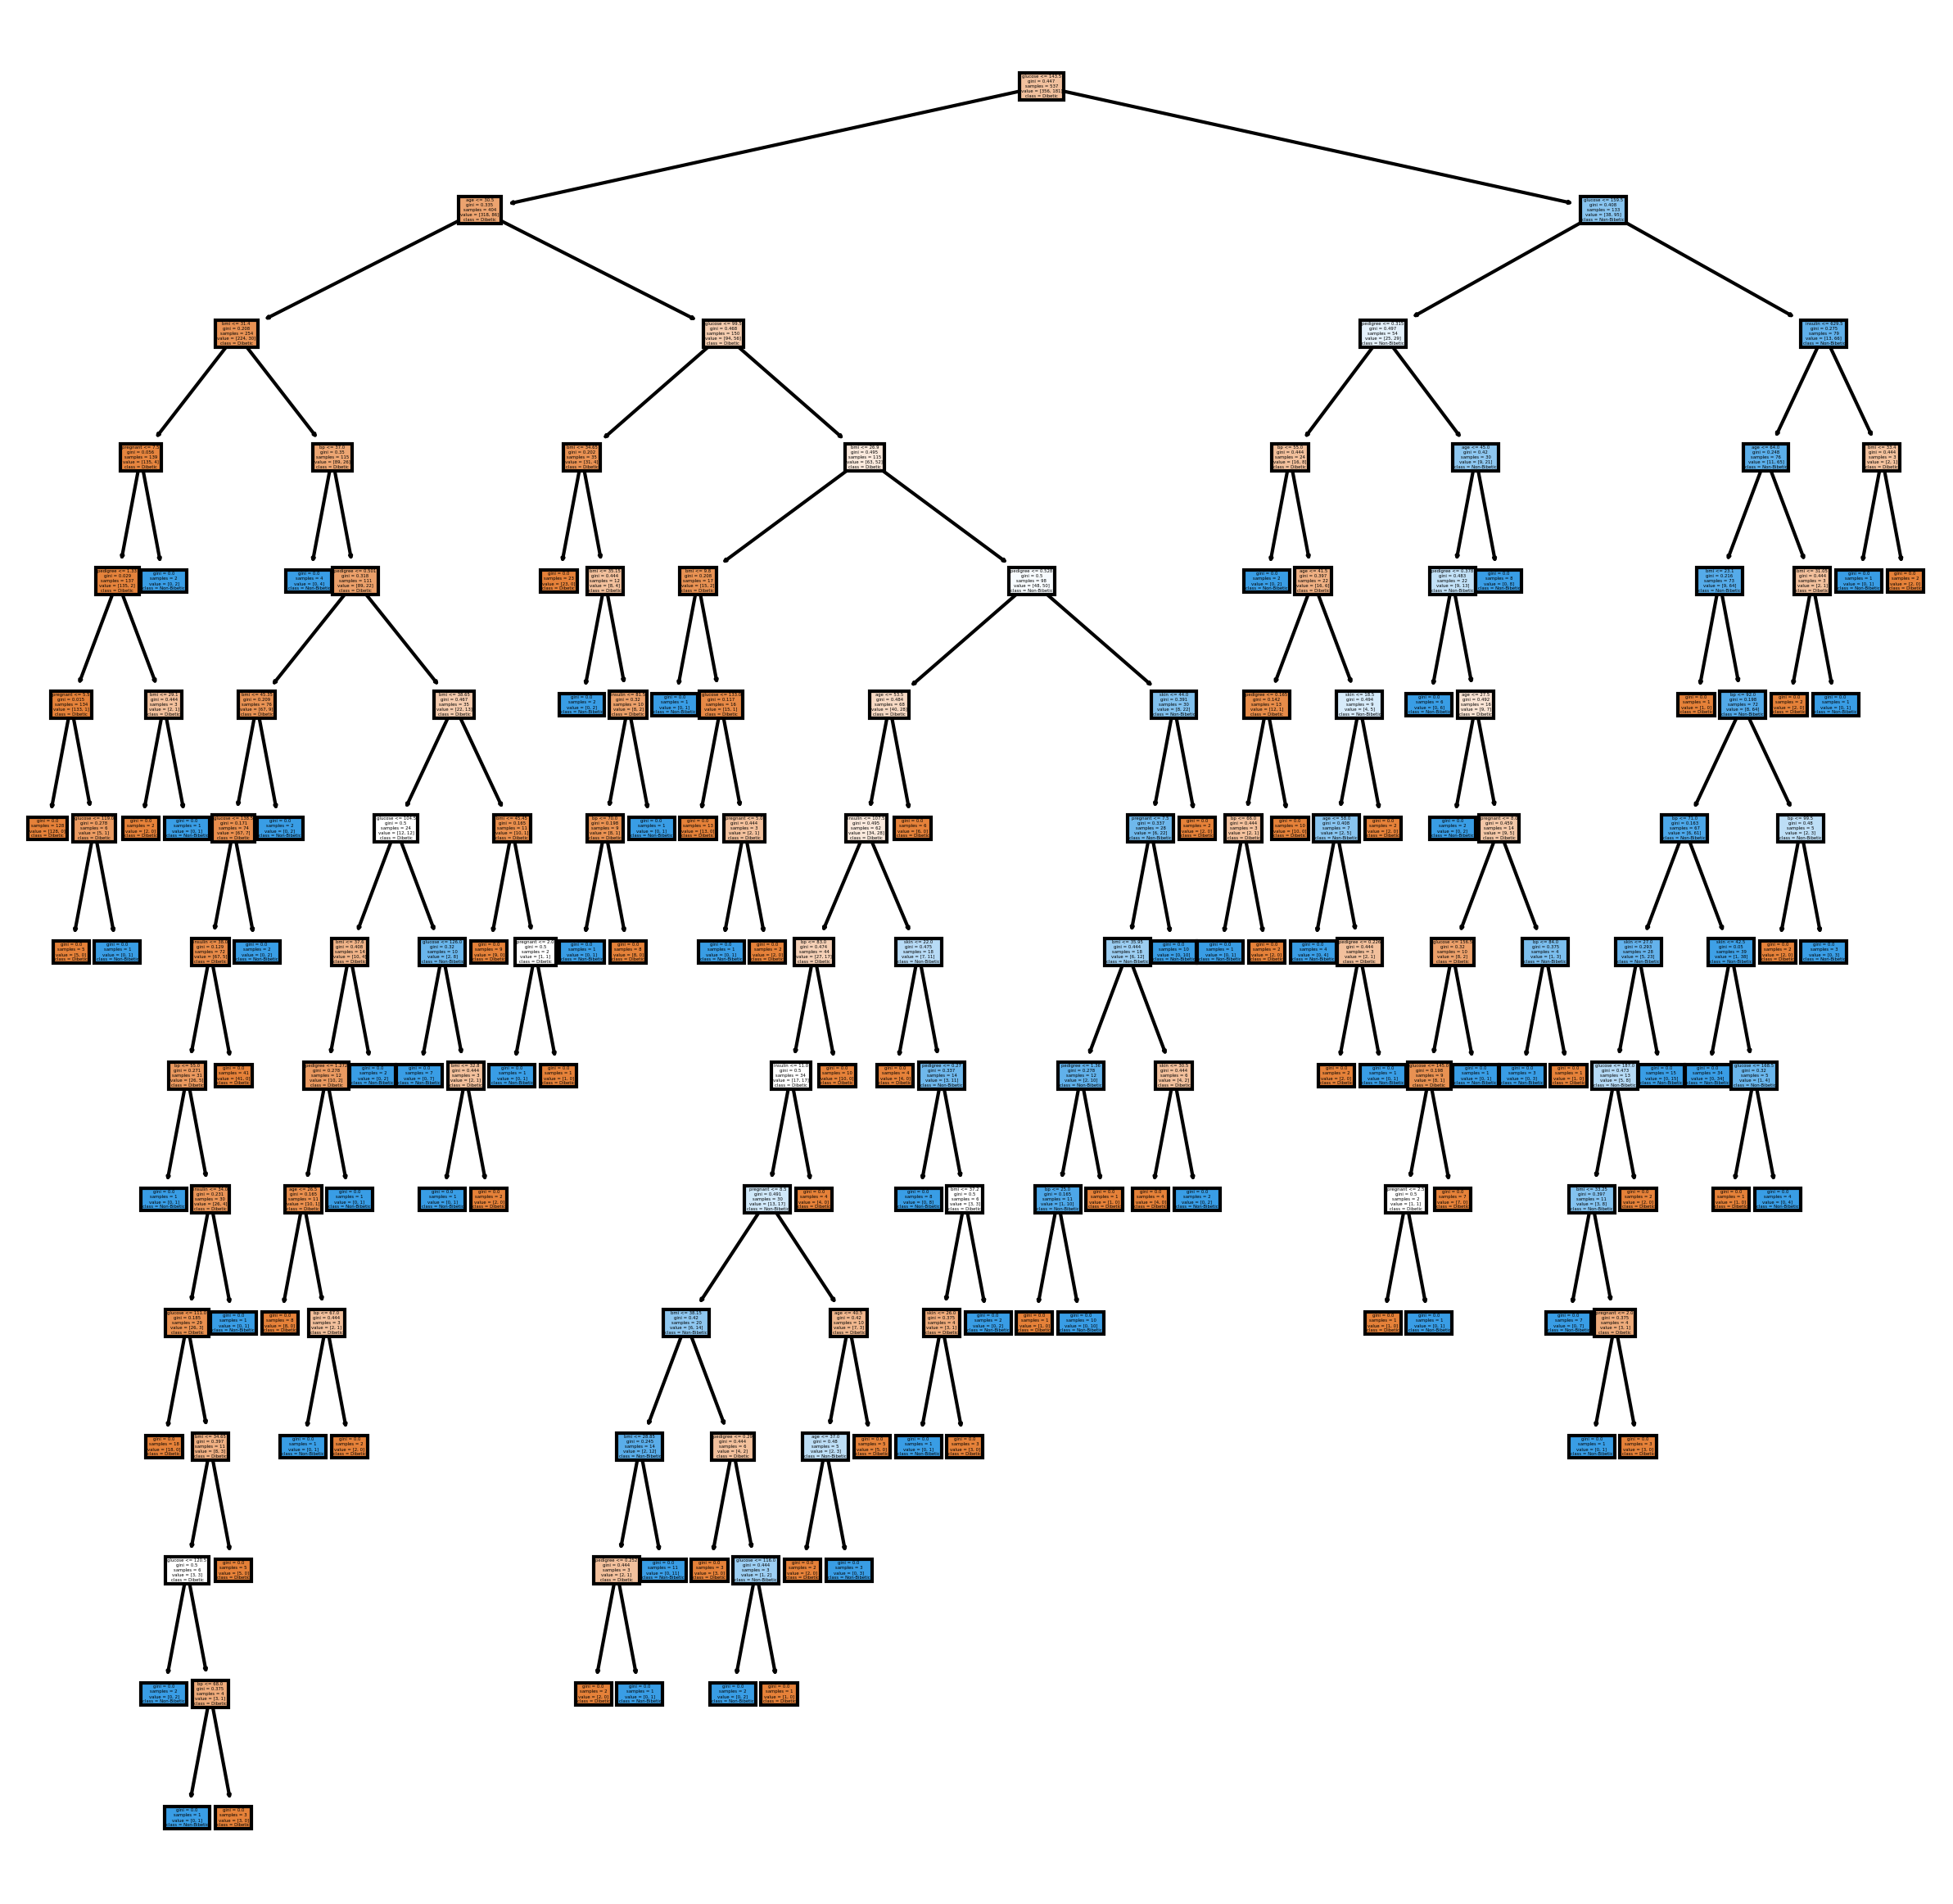

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf,
               feature_names = Feature, 
               class_names=cn,
               filled = True);
fig.savefig('Tree.png')

**Optimizing Decision Tree Performance**

In [51]:
clf1=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [52]:
clf1=clf1.fit(x_train,y_train)

In [53]:
y_pred1=clf1.predict(x_test)

In [54]:
print("Accuracy score= ",metrics.accuracy_score(y_pred1,y_test))

Accuracy score=  0.7575757575757576


In [55]:
print("Confusion Metrics=\n",metrics.confusion_matrix(y_pred1,y_test))

Confusion Metrics=
 [[126  38]
 [ 18  49]]


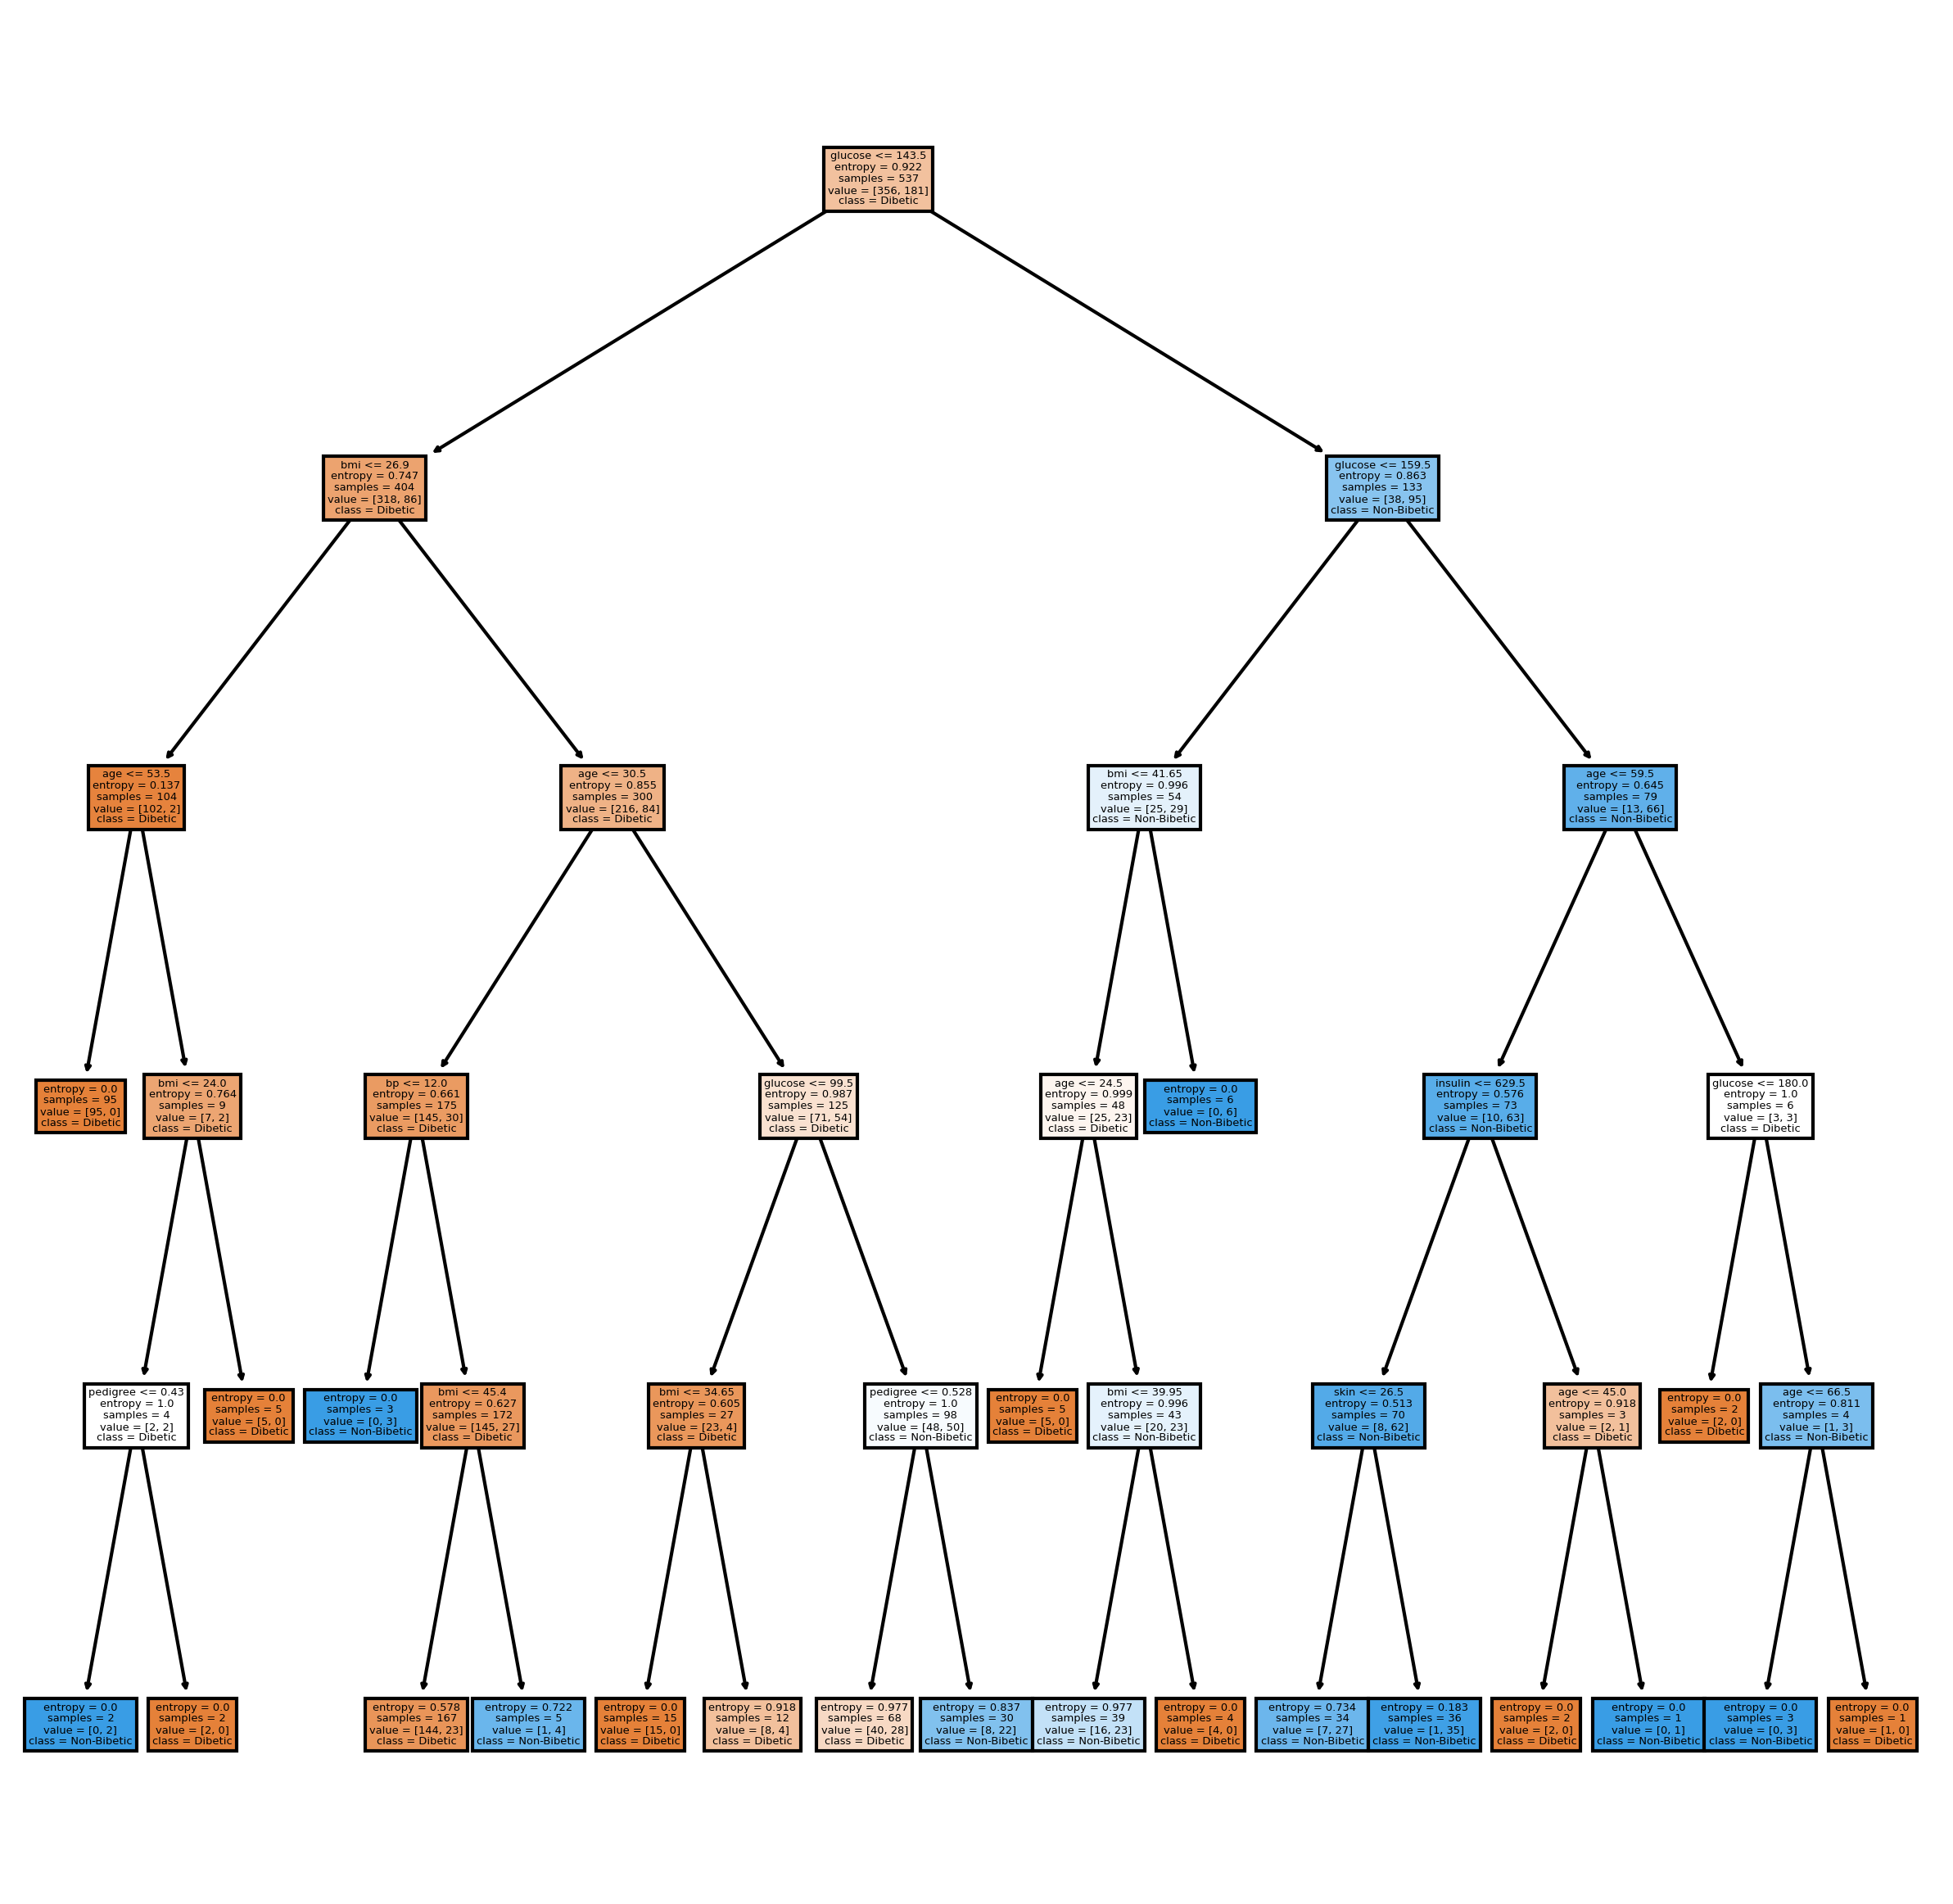

In [56]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf1,
               feature_names = Feature, 
               class_names=cn,
               filled = True);
fig.savefig('Tree1.png')